In [76]:
#todo Frage: Was ist mit den Schaltjahren?? 29. Februar auslassen?

import pandas as pd
year1 = 2012
year2 = " "

In [77]:
# Es wird hier die externe WEB-Datei eingelesen

In [78]:
df_web = pd.read_csv("WEB_normalized_allyears.csv", delimiter=";", parse_dates=True, index_col=0)
df_web

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III
Datetime UCT,,,,,,
2011-01-01 00:00:00,0.0,0.0,0.220798,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.280753,0.0,0.0,0.0
2011-01-01 02:00:00,0.0,0.0,0.233616,0.0,0.0,0.0
2011-01-01 03:00:00,0.0,0.0,0.216870,0.0,0.0,0.0
2011-01-01 04:00:00,0.0,0.0,0.322100,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-12-02 19:00:00,0.0,0.0,0.549101,0.0,0.0,0.0
2020-12-02 20:00:00,0.0,0.0,0.647095,0.0,0.0,0.0
2020-12-02 21:00:00,0.0,0.0,0.813107,0.0,0.0,0.0


In [79]:
# DataFrame wird nur für das ausgewählte Jahr definiert

In [80]:
df = df_web[df_web.index.year==year1]
df = df.iloc[0:8760]
df

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III
Datetime UCT,,,,,,
2012-01-01 00:00:00,0.017533,0.0,0.001034,0.0,0.0,0.0
2012-01-01 01:00:00,0.002296,0.0,0.084763,0.0,0.0,0.0
2012-01-01 02:00:00,0.006470,0.0,0.129833,0.0,0.0,0.0
2012-01-01 03:00:00,0.016698,0.0,0.112466,0.0,0.0,0.0
2012-01-01 04:00:00,0.043206,0.0,0.199711,0.0,0.0,0.0
...,...,...,...,...,...,...
2012-12-30 20:00:00,0.080568,0.0,0.499483,0.0,0.0,0.0
2012-12-30 21:00:00,0.037570,0.0,0.241885,0.0,0.0,0.0
2012-12-30 22:00:00,0.030265,0.0,0.175522,0.0,0.0,0.0


In [81]:
if year2 == " ":
    pass
else:
    df2 = df_web[df_web.index.year==year2]
df2

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III
Datetime UCT,,,,,,


In [82]:
#"Dates" wird als das gegebene Jahr definiert und als "index" für die peexcel-Daten zugewiesen. Mit dem Befehl "concat" werden die vorher definierte "df" und die hier eingelesene "df_pee" zu einem "df" verkettet.

In [83]:
import numpy as np
dates = np.arange("{}-01-01" .format(year1),"{}-01-01 00:00" .format(year1+1), dtype="datetime64[h]")
if len(dates) > 8760:
    dates = np.delete(dates, range(8760,8784), axis=0)
else:
    dates
df_pee = pd.read_csv("peexcel_normalized.csv", index_col=0)
df_pee.index = dates

df = pd.concat([df, df_pee[["WEB 2015 Umgebung Wien", "Wind AT 2018"]]], axis=1)
df

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III,WEB 2015 Umgebung Wien,Wind AT 2018
2012-01-01 00:00:00,0.017533,0.0,0.001034,0.0,0.0,0.0,0.000000,0.313971
2012-01-01 01:00:00,0.002296,0.0,0.084763,0.0,0.0,0.0,0.000000,0.285723
2012-01-01 02:00:00,0.006470,0.0,0.129833,0.0,0.0,0.0,0.000000,0.318035
2012-01-01 03:00:00,0.016698,0.0,0.112466,0.0,0.0,0.0,0.000000,0.237349
2012-01-01 04:00:00,0.043206,0.0,0.199711,0.0,0.0,0.0,0.000000,0.155524
...,...,...,...,...,...,...,...,...
2012-12-30 20:00:00,0.080568,0.0,0.499483,0.0,0.0,0.0,0.052745,0.187702
2012-12-30 21:00:00,0.037570,0.0,0.241885,0.0,0.0,0.0,0.026788,0.174650
2012-12-30 22:00:00,0.030265,0.0,0.175522,0.0,0.0,0.0,0.002470,0.145799
2012-12-30 23:00:00,0.039449,0.0,0.442423,0.0,0.0,0.0,0.001984,0.109392


Freigabesignal wenn > x% der Nennleistung

In [84]:
if year2 == " ":
    pass
else:
    dates2 = np.arange("{}-01-01" .format(year2),"{}-01-01 00:00" .format(year2+1), dtype="datetime64[h]")
    if len(dates2) > 8760:
        dates2 = np.delete(dates2, range(8760,8784), axis=0)
    else:
        dates2
    df_pee2 = pd.read_csv("peexcel_normalized.csv", index_col=0)
    df_pee2.index = dates2
    df2 = pd.concat([df2, df_pee2[["WEB 2015 Umgebung Wien", "Wind AT 2018"]]], axis=1)
df2

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III
Datetime UCT,,,,,,


In [85]:
import os



In [86]:
if year2 == " ":
    if not os.path.exists("Plots/{}" .format(year1)):
        os.makedirs("Plots/{}" .format(year1))
else:
    if not os.path.exists("Plots/{}_{}" .format(year1, year2)):
        os.makedirs("Plots/{}_{}" .format(year1, year2))

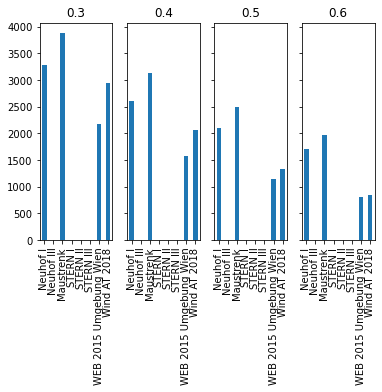

In [87]:
import matplotlib.pyplot as plt

cutoffs = [0.3,0.4,0.5,0.6]
anzahl = pd.DataFrame()
anzahl2 = pd.DataFrame()

if year2 == " ":
    fig, ax = plt.subplots(1, len(cutoffs), sharey=True)
    for i, x in enumerate(cutoffs):
        sig = df.where(df>x)
        sig.count().plot(kind="bar", ax=ax[i], title=x)
        anzahl[x] = sig.count()
    fig.savefig("Plots/{}/Freigabe-threshold_WEB_{}.png" .format(year1, year1), dpi=300, bbox_inches="tight")

else:
    fig, ax = plt.subplots(2, len(cutoffs), sharey=True, sharex=True)
    for i, x in enumerate(cutoffs):
        sig = df.where(df>x)
        sig.count().plot(kind="bar", ax=ax[0, i])

        sig2 = df2.where(df2>x)
        sig2.count().plot(kind="bar", ax=ax[1, i])
        anzahl[x] = sig.count()
        anzahl2[x] = sig.count()
    anzahl
    anzahl2
    fig.savefig("Plots/{}_{}/Freigabe-threshold_WEB_{}_{}.png" .format(year1, year2, year1, year2), dpi=300, bbox_inches="tight")

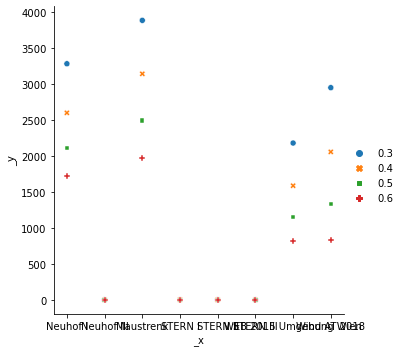

In [88]:
import seaborn as sns
#anzahl
sns.relplot(data=anzahl)

In [89]:
if year2 == " ":
    pass
else:
    sns.relplot(data=anzahl2)

In [90]:
df.columns

Index(['Neuhof I', 'Neuhof III', 'Maustrenk', 'STERN I', 'STERN II',
       'STERN III', 'WEB 2015 Umgebung Wien', 'Wind AT 2018'],
      dtype='object')

In [91]:
cut = 0.4
df_sign = pd.DataFrame()
df2_sign = pd.DataFrame()

if year2 == " ":
    for c in df.columns:
        df_sign[c] = df[c].map(lambda x: -1 if x < cut else 1)
else:
    for c in df.columns:
        df_sign[c] = df[c].map(lambda x: -1 if x < cut else 1)
    for c in df2.columns:
        df2_sign[c] = df2[c].map(lambda x: -1 if x < cut else 1)

In [92]:
df_sign.head()

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III,WEB 2015 Umgebung Wien,Wind AT 2018
2012-01-01 00:00:00,-1,-1,-1,-1,-1,-1,-1,-1
2012-01-01 01:00:00,-1,-1,-1,-1,-1,-1,-1,-1
2012-01-01 02:00:00,-1,-1,-1,-1,-1,-1,-1,-1
2012-01-01 03:00:00,-1,-1,-1,-1,-1,-1,-1,-1
2012-01-01 04:00:00,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
from matplotlib.dates import MonthLocator
from matplotlib.dates import DateFormatter

if year2 == " ":
    fig, ax = plt.subplots(len(df_sign.columns), 1, sharex=True, sharey=True, figsize=(12,6))
    for i, col in enumerate(df_sign.columns):
        vis = pd.pivot_table(df_sign,
                         index=df_sign.index.date, columns=df_sign.index.hour, values=col)
        sns.heatmap(vis.T,
                cbar=False,
                yticklabels=False,
                ax=ax[i])
        ax[i].set_title(col, loc="right", color="lime", fontsize=12, pad=-11)
        months = MonthLocator()
        monthsFmt = DateFormatter("%b")
        ax[i].xaxis.set_major_locator(months)
        ax[i].xaxis.set_major_formatter(monthsFmt)
else:
    fig, ax = plt.subplots(len(df_sign.columns), 2, sharex=True, sharey=True, figsize=(12,6))
    for i, col in enumerate(df_sign.columns):
        vis = pd.pivot_table(df_sign,
                         index=df_sign.index.date, columns=df_sign.index.hour, values=col)
        sns.heatmap(vis.T,
                cbar=False,
                yticklabels=False,
                ax=ax[i, 0])
        ax[i, 0].set_title(col, loc="right", color="lime", fontsize=12, pad=-11)
        months = MonthLocator()
        monthsFmt = DateFormatter("%b")
        ax[i, 0].xaxis.set_major_locator(months)
        ax[i, 0].xaxis.set_major_formatter(monthsFmt)
    for i, col in enumerate(df2_sign.columns):
        vis = pd.pivot_table(df2_sign,
                         index=df2_sign.index.date, columns=df2_sign.index.hour, values=col)
        sns.heatmap(vis.T,
                cbar=False,
                yticklabels=False,
                ax=ax[i, 1])
        ax[i, 1].set_title(col, loc="right", color="lime", fontsize=12, pad=-11)
        months = MonthLocator()
        monthsFmt = DateFormatter("%b")
        ax[i, 1].xaxis.set_major_locator(months)
        ax[i, 1].xaxis.set_major_formatter(monthsFmt)

In [ ]:
if year2 == " ":
    fig.savefig("Plots/{}/heatmap_WEB_{}.png" .format(year1, year1), dpi=300)
else:
    fig.savefig("Plots/{}_{}/heatmap_WEB_{}_{}.png" .format(year1, year2, year1, year2), dpi=300)

In [ ]:
df_step = pd.DataFrame()
df_not = pd.DataFrame()
df2_step = pd.DataFrame()
df2_not = pd.DataFrame()

if year2 == " ":
    fig, ax = plt.subplots(1)
    for c in df_sign.columns:
        df_step[c] =  df_sign[c].shift(1).ne(df_sign[c]).where(df_sign[c]==1).cumsum()
        df_not[c] =  df_sign[c].shift(1).ne(df_sign[c]).where(df_sign[c]==-1).cumsum()
else:
    fig, ax = plt.subplots(2)
    for c in df_sign.columns:

        df_step[c] =  df_sign[c].shift(1).ne(df_sign[c]).where(df_sign[c]==1).cumsum()
        df_not[c] =  df_sign[c].shift(1).ne(df_sign[c]).where(df_sign[c]==-1).cumsum()
    for c in df2_sign.columns:
        df2_step[c] =  df2_sign[c].shift(1).ne(df2_sign[c]).where(df2_sign[c]==1).cumsum()
        df2_not[c] =  df2_sign[c].shift(1).ne(df2_sign[c]).where(df2_sign[c]==-1).cumsum()

In [ ]:
if year2 == " ":
    df_step.iloc[0,:] = 0
else:
    df_step.iloc[0,:] = 0
    df2_step.iloc[0,:] = 0

df2_step

In [ ]:
if year2 == " ":
    df_step["{}" .format(year1)].plot(figsize=(12,5), ylabel="Number of Signal", grid=True, ax=ax)
    fig.savefig("Plots/{}/cumplot_WEB_{}.png" .format(year1, year1), dpi=300)
else:
    df_step["{}" .format(year1)].plot(figsize=(12,5), ylabel="Number of Signal", grid=True, ax=ax[0])
    df2_step["{}" .format(year2)].plot(figsize=(12,5), ylabel="Number of Signal", grid=True, ax=ax[1])
    fig.savefig("Plots/{}_{}/cumplot_WEB_{}_{}.png" .format(year1, year2, year1, year2), dpi=300)

In [ ]:
df_step.fillna(0, inplace=True)
df_not.fillna(0, inplace=True)

In [ ]:
desc = pd.DataFrame()
desc["Zeitraum mit Signal [h]"] = anzahl[0.4]
desc["Nicht-Signal-Zeitraum [h]"] = 8760 - anzahl[0.4]
desc["Anzahl Signal-Perioden"] = df_step.max()
desc["Durchschnittliche Dauer Signal [h]"] = (desc["Zeitraum mit Signal [h]"]/desc["Anzahl Signal-Perioden"])
desc["Durchschnittliche Dauer Nicht-Signal [h]"] = desc["Nicht-Signal-Zeitraum [h]"]/desc["Anzahl Signal-Perioden"]

desc

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
desc[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
    .plot(kind="bar",color=["cyan", "black"], stacked=True, ax = ax[0])
ax[0].set_ylabel("Stunden")
desc["Anzahl Signal-Perioden"]\
    .plot(kind="bar",color=["cyan"], stacked=True, ax = ax[1])
ax[1].set_ylabel("Anzahl Signal-Perioden")
desc[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
    .plot(kind="bar",color=["orange", "grey"], stacked=False, ax = ax[2])
ax[2].set_ylabel("Stunden")
fig.savefig("Plots/{}/descriptive_WEB_{}.png" .format(year1, year1), dpi=300, bbox_inches='tight')

In [ ]:
df_step.head()

In [ ]:
bins= [6,12,24,48,72,96,168, 168*2, 168*3, 168*5 ]

In [ ]:

hours = [6*i for i in range(8*6)]
days = range(8)


In [ ]:
df_not

In [ ]:
df_hourly_not = pd.DataFrame()
for c in df_not.columns:
    df_hourly_not[c]=(df_not[c]).value_counts(sort=True)
df_hourly_not.sort_index()

In [ ]:
fig, ax = plt.subplots()
df_hourly_not.hist(bins=hours, alpha=0.8, sharey=True, sharex=True, figsize=(12,6))
fig.savefig("Plots/{}/hists_WEB_{}.png" .format(year1, year1), dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), sharey=True)


sns.histplot(df_hourly_not, kde=False,alpha=0.1,linewidth=1,
             fill=True,
             cumulative=False,
             element="step",
             bins=hours, ax=ax)


ax.set_xlabel("Nicht-Signale kürzer als (6h Blöcke)")
fig.savefig("Plots/{}/all_hists_WEB_{}.png" .format(year1, year1), dpi=300)

doku daziu:
https://seaborn.pydata.org/generated/seaborn.histplot.html